<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Frameworks (Keras)

## *Data Science Unit 4 Sprint 2 Lesson 3*

# Lets Use Libraries!

The objective of the last two days has been to familiarize you with the fundamentals of neural networks: terminology, structure of networks, forward propagation, error/cost functions, backpropagation, epochs, and gradient descent. We have tried to reinforce these topics by requiring to you code some of the simplest neural networks by hand including Perceptrons (single node neural networks) and Multi-Layer Perceptrons also known as Feed-Forward Neural Networks. Continuing to do things by hand would not be the best use of our limited time. You're ready to graduate from doing things by hand and start using some powerful libraries to build cutting-edge predictive models. 

# Keras

> "Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research. Use Keras if you need a deep learning library that:

> Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
Supports both convolutional networks and recurrent networks, as well as combinations of the two.
Runs seamlessly on CPU and GPU." 

## Installation

The Keras API is particularly straightforward and it already comes pre-installed on Google Colab! 

<img src="http://www.ryanleeallred.com/wp-content/uploads/2019/04/pip-freeze-keras.png" width="300">

If you're not on Google Colab you'll need to install one of the "backend" engines that Keras runs on top of. I recommend Tensorflow:

> `pip install tensorflow`

Google Colab does not have the latest Tensorflow 2.0 installation, so you'll need to upgrade to that if you want to experiment with it. However Tensorflow 2.0 was just released last month and is still in "alpha" so if you **really** want to use the latest and greatest be prepared for odd bugs that you don't have control over every once in a while. <https://www.tensorflow.org/install/>

In [1]:
# Use pip freeze to see what packages/libraries your notebook has access to
# !pip freeze

import tensorflow
tensorflow.__version__

'1.14.0'

## Our First Keras Model - Perceptron, Batch epochs

1) Load Data

2) Define Model

3) Compile Model

4) Fit Model

5) Evaluate Model

### Load Data

Our life is going to be easier if our data is already cleaned up and numeric, so lets use this dataset from Jason Brownlee that is already numeric and has no column headers so we'll need to slice off the last column of data to act as our y values.

In [2]:
import pandas as pd

url ="https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

dataset = pd.read_csv(url, header=None)

In [3]:
dataset.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
X = dataset.values[:,0:8]
print(X.shape)
print(X)

(768, 8)
[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [4]:
y = dataset.values[:,-1]
print(y.shape)
print(y)

(768,)
[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1

### Define Model

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

np.random.seed(812)

I'll instantiate my model as a "sequential" model. This just means that I'm going to tell Keras what my model's architecture should be one layer at a time.

In [6]:
# https://keras.io/getting-started/sequential-model-guide/
model = Sequential()

Adding a "Dense" layer to our model is how we add "vanilla" perceptron-based layers to our neural network. These are also called "fully-connected" or "densely-connected" layers. They're used as a layer type in lots of other Neural Net Architectures but they're not referred to as perceptrons or multi-layer perceptrons very often in those situations even though that's what they are.

 > ["Just your regular densely-connected NN layer."](https://keras.io/layers/core/)
 
 The first argument is how many neurons we want to have in that layer. To create a perceptron model we will just set it to 1. We will tell it that there will be 8 inputs coming into this layer from our dataset and set it to use the sigmoid activation function.

In [7]:
model.add(Dense(1,input_dim=8,activation='sigmoid'))

W0814 12:41:51.910866 4612871616 deprecation.py:506] From /Users/stephensinclair/anaconda3/envs/U4-S2-NNF/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Compile Model
Using binary_crossentropy as the loss function here is just telling keras that I'm doing binary classification so that it can use the appropriate loss function accordingly. If we were predicting non-binary categories we might assign something like `categorical_crossentropy`. We're also telling keras that we want it to report model accuracy as our main error metric for each epoch. We will also be able to see the overall accuracy once the model has finished training.

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

W0814 12:47:35.959898 4612871616 deprecation.py:323] From /Users/stephensinclair/anaconda3/envs/U4-S2-NNF/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
model.fit(X,y, epochs = 150)

Epoch 1/150
768/768 [==============================] - 2s 3ms/sample - loss: 37.3529 - acc: 0.3503
Epoch 2/150
768/768 [==============================] - 0s 103us/sample - loss: 32.5743 - acc: 0.3451
Epoch 3/150
768/768 [==============================] - 0s 76us/sample - loss: 27.8590 - acc: 0.3372
Epoch 4/150
768/768 [==============================] - 0s 82us/sample - loss: 23.6344 - acc: 0.3255
Epoch 5/150
768/768 [==============================] - 0s 120us/sample - loss: 20.0893 - acc: 0.3568
Epoch 6/150
768/768 [==============================] - 0s 98us/sample - loss: 17.3013 - acc: 0.3776
Epoch 7/150
768/768 [==============================] - 0s 195us/sample - loss: 15.1056 - acc: 0.4076
Epoch 8/150
768/768 [==============================] - 0s 78us/sample - loss: 13.3655 - acc: 0.4375
Epoch 9/150
768/768 [==============================] - 0s 291us/sample - loss: 11.9776 - acc: 0.4557
Epoch 10/150
768/768 [==============================] - 0s 385us/sample - loss: 10.8042 - acc: 0.

In [13]:
y.shape

(768,)

### Evaluate model

In [14]:
y[:50]

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.])

In [12]:
sum(y) / len(y) # Predicting never diabetes is 65%

0.3489583333333333

In [15]:
scores = model.evaluate(X,y)
print(f"{model.metrics_names[1]}: {scores[1]*100}")

768/768 [==============================] - 0s 169us/sample - loss: 0.5770 - acc: 0.7096
acc: 70.96354365348816


#### Adam Optimizer
Check out this links for more background on the Adam optimizer and Stohastic Gradient Descent
* [Adam Optimization Algorithm](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)
* [Adam Optimizer - original paper](https://arxiv.org/abs/1412.6980)

### Model in four lines

In [18]:
model = Sequential()
model.add(Dense(1, input_dim=8, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=150)

Epoch 1/150
768/768 [==============================] - 0s 230us/sample - loss: 10.0536 - acc: 0.4870
Epoch 2/150
768/768 [==============================] - 0s 81us/sample - loss: 9.7297 - acc: 0.4570
Epoch 3/150
768/768 [==============================] - 0s 137us/sample - loss: 9.5447 - acc: 0.4544
Epoch 4/150
768/768 [==============================] - 0s 168us/sample - loss: 9.3671 - acc: 0.4544
Epoch 5/150
768/768 [==============================] - 0s 140us/sample - loss: 9.2021 - acc: 0.4583
Epoch 6/150
768/768 [==============================] - 0s 100us/sample - loss: 9.0295 - acc: 0.4492
Epoch 7/150
768/768 [==============================] - 0s 123us/sample - loss: 8.8687 - acc: 0.4505
Epoch 8/150
768/768 [==============================] - 0s 119us/sample - loss: 8.6871 - acc: 0.4479
Epoch 9/150
768/768 [==============================] - 0s 184us/sample - loss: 8.5336 - acc: 0.4531
Epoch 10/150
768/768 [==============================] - 0s 111us/sample - loss: 8.3758 - acc: 0.4583

### Why are we getting such different results if we re-run the model?

<https://machinelearningmastery.com/randomness-in-machine-learning/>

# What architecture should we try?

In [19]:
model_improved = Sequential()

# Input + 1 First Hidden
model_improved.add(Dense(10, input_dim=8, activation='relu'))
# Hidden
model_improved.add(Dense(3, activation='sigmoid'))
# Output
model_improved.add(Dense(1, activation='sigmoid'))

model_improved.compile(loss='binary_crossentropy', 
                       optimizer='adam',
                       metrics=['accuracy'])

model_improved.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 33        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_improved.fit(X,y, epochs=150, batch_size=32, verbose=0)

In [21]:
score = model_improved.evaluate(X,y)
print(f"{model_improved.metrics_names[1]}: {scores[1]*100}")

768/768 [==============================] - 1s 844us/sample - loss: 0.6207 - acc: 0.6758
acc: 70.96354365348816


# Activation Functions

What is an activation function and how does it work?

- Takes in a weighted sum of inputs + a bias from the previous layer and outputs an "activation" value.
- Based its inputs the neuron decides how 'activated' it should be. This can be thought of as the neuron deciding how strongly to fire. You can also think of it as if the neuron is deciding how much of the signal that it has received to pass onto the next layer. 
- Our choice of activation function does not only affect signal that is passed forward but also affects the backpropagation algorithm. It affects how we update weights in reverse order since activated weight/input sums become the inputs of the next layer. 


## Step Function

![Heaviside Step Function](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Dirac_distribution_CDF.svg/325px-Dirac_distribution_CDF.svg.png)

All or nothing, a little extreme, which is fine, but makes updating weights through backpropagation impossible. Why? remember that during backpropagation we use derivatives in order to determine how much to update or not update weights. What is the derivative of the step function?

## Linear Function

![Linear Function](http://www.roconnell.net/Parent%20function/linear.gif)

The linear function takes the opposite tact from the step function and passes the signal onto the next layer by a constant factor. There are problems with this but the biggest problems again lie in backpropagation. The derivative of any linear function is a horizontal line which would indicate that we should update all weights by a constant amount every time -which on balance wouldn't change the behavior of our network. Linear functions are typically only used for very simple tasks where interpretability is important, but if interpretability is your highest priority, you probably shouldn't be using neural networks in the first place.

## Sigmoid Function

![Sigmoid Function](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/480px-Logistic-curve.svg.png)

The sigmoid function works great as an activation function! it's continuously differentiable, its derivative doesn't have a constant slope, and having the higher slope in the middle pushes y value predictions towards extremes which is particularly useful for binary classification problems. I mean, this is why we use it as the squishifier in logistic regression as well. It constrains output, but over repeated epochs pushes predictions towards a strong binary prediction. 

What's the biggest problem with the sigmoid function? The fact that its slope gets pretty flat so quickly after its departure from zero. This means that updating weights based on its gradient really diminishes the size of our weight updates as our model gets more confident about its classifications. This is why even after so many iterations with our test score example we couldn't reach the levels of fit that our gradient descent based model could reach in just a few epochs.

## Tanh Function

![Tanh Function](http://mathworld.wolfram.com/images/interactive/TanhReal.gif)

What if the sigmoid function didn't get so flat quite as soon when moving away from zero and was a little bit steeper in the middle? That's basically the Tanh function. The Tanh function can actually be created by scaling the sigmoid function by 2 in the y dimension and subtracting 1 from all values. It has basically the same properties as the sigmoid, still struggles from diminishingly flat gradients as we move away from 0, but its derivative is higher around 0 causing weights to move to the extremes a little faster. 

## ReLU Function

![ReLU Function](https://cdn-images-1.medium.com/max/937/1*oePAhrm74RNnNEolprmTaQ.png)

ReLU stands for Rectified Linear Units it is by far the most commonly used activation function in modern neural networks. It doesn't activate neurons that are being passed a negative signal and passes on positive signals. Think about why this might be useful. Remember how a lot of our initial weights got set to negative numbers by chance? This would have dealt with those negative weights a lot faster than the sigmoid function updating. What does the derivative of this function look like? It looks like the step function! This means that not all neurons are activated. With sigmoid basically all of our neurons are passing some amount of signal even if it's small making it hard for the network to differentiate important and less important connections. ReLU turns off a portion of our less important neurons which decreases computational load, but also helps the network learn what the most important connections are faster. 

What's the problem with relu? Well the left half of its derivative function shows that for neurons that are initialized with weights that cause them to have no activation, our gradient will not update those neuron's weights, this can lead to dead neurons that never fire and whose weights never get updated. We would probably want to update the weights of neurons that didn't fire even if it's just by a little bit in case we got unlucky with our initial weights and want to give those neurons a chance of turning back on in the future.

## Leaky ReLU

![Leaky ReLU](https://cdn-images-1.medium.com/max/1600/1*ypsvQH7kvtI2BhzR2eT_Sw.png)

Leaky ReLU accomplishes exactly that! it avoids having a gradient of 0 on the left side of its derivative function. This means that even "dead" neurons have a chance of being revived over enough iterations. In some specifications the slope of the leaky left-hand side can also be experimented with as a hyperparameter of the model!

## Softmax Function

![Softmax Function](https://cdn-images-1.medium.com/max/800/1*670CdxchunD-yAuUWdI7Bw.png)

Like the sigmoid function but more useful for multi-class classification problems. The softmax function can take any set of inputs and translate them into probabilities that sum up to 1. This means that we can throw any list of outputs at it and it will translate them into probabilities, this is extremely useful for multi-class classification problems. Like MNIST for example...

## Major takeaways

- ReLU is generally better at obtaining the optimal model fit.
- Sigmoid and its derivatives are usually better at classification problems.
- Softmax for multi-class classification problems. 

You'll typically see ReLU used for all initial layers and then the final layer being sigmoid or softmax for classification problems. But you can experiment and tune these selections as hyperparameters as well!

## MNIST with Keras 

### This will be a good chance to bring up dropout regularization. :)

In [53]:
### Let's do it!
from tensorflow import keras 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Stretch - use dropout

import numpy as np

In [54]:
batch_size = 64
num_class = 10
epochs = 150

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [55]:
X_train.shape

(60000, 28, 28)

In [56]:
# Reshape the data into single vectors
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [57]:
# X Variable Types
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [58]:
# Correct encoding of y
# What softmax expects = [0,0,0,0,0,1,0,0,0,0]

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [59]:
mnist_model = Sequential()

# Input -> Hidden (or input shape = (784,))
mnist_model.add(Dense(16, input_dim=784, activation='relu'))

#Hidden
mnist_model.add(Dense(16, activation='relu'))

# Output Layer
mnist_model.add(Dense(10, activation='softmax'))

mnist_model.compile(loss='categorical_crossentropy',
                    optimizer='adam', 
                    metrics=['accuracy'])
mnist_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_19 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [60]:
784*16 

12544

In [62]:
history = mnist_model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_split=.1, verbose=1)
scores = mnist_model.evaluate(X_test, y_test)
print(f'{mnist_model.metrics_names[1]}: {scores[1]*100}')

Train on 54000 samples, validate on 6000 samples
Epoch 1/150
54000/54000 [==============================] - 3s 57us/sample - loss: 0.9799 - acc: 0.6142 - val_loss: 0.9265 - val_acc: 0.6315
Epoch 2/150
54000/54000 [==============================] - 3s 58us/sample - loss: 0.9727 - acc: 0.6167 - val_loss: 0.9279 - val_acc: 0.6215
Epoch 3/150
54000/54000 [==============================] - 3s 58us/sample - loss: 0.9682 - acc: 0.6193 - val_loss: 0.9089 - val_acc: 0.6473
Epoch 4/150
54000/54000 [==============================] - 4s 74us/sample - loss: 0.9670 - acc: 0.6230 - val_loss: 0.8983 - val_acc: 0.6387
Epoch 5/150
54000/54000 [==============================] - 5s 95us/sample - loss: 0.9609 - acc: 0.6247 - val_loss: 0.9030 - val_acc: 0.6443
Epoch 6/150
54000/54000 [==============================] - 4s 78us/sample - loss: 0.9520 - acc: 0.6251 - val_loss: 0.8867 - val_acc: 0.6462
Epoch 7/150
54000/54000 [==============================] - 9s 160us/sample - loss: 0.9511 - acc: 0.6261 - val_l

In [68]:
X_train[0].shape

(784,)

In [84]:
#  predict_classes(self, x, batch_size=32, verbose=0)
#  |      Generate class predictions for the input samples.
#  |      
#  |      The input samples are processed batch by batch.
#  |      
#  |      Arguments:
#  |          x: input data, as a Numpy array or list of Numpy arrays
#  |              (if the model has multiple inputs).
#  |          batch_size: integer.
#  |          verbose: verbosity mode, 0 or 1.

mnist_model.predict_classes(X_train[1:5], verbose=1)

4/4 [==============================] - 0s 511us/sample


array([0, 4, 1, 9])

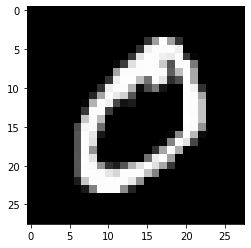

In [77]:
digit2 = X_train[1].reshape([28, 28]);
plt.gray()
plt.imshow(digit2)

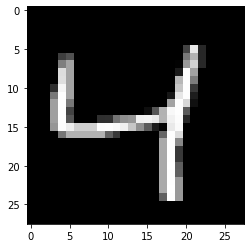

In [78]:
digit3 = X_train[2].reshape([28, 28]);
plt.gray()
plt.imshow(digit3)

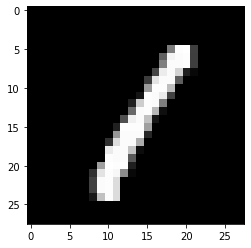

In [82]:
digit4 = X_train[3].reshape([28, 28]);
plt.gray()
plt.imshow(digit4)

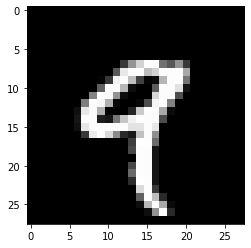

In [83]:
digit5 = X_train[4].reshape([28, 28]);
plt.gray()
plt.imshow(digit5)

In [63]:
help(mnist_model)

Help on Sequential in module tensorflow.python.keras.engine.sequential object:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dens

In [75]:
### Try it with dropout

def prepare_data(X):
    
    # Reshape x
    # make sure everything a float
    # etc.
    return X_prepared

y_pred = mnist_model.predict_classes(X_test)

## What if we use dropout techniques to prevent overfitting? How does that affect our model?

![Regularization](https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Regularization.svg/354px-Regularization.svg.png)

In [85]:
### Let's do it!
from tensorflow import keras 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import numpy as np

mnist_model2 = Sequential()

# Hidden
mnist_model2.add(Dense(32, input_dim=784, activation='relu'))
mnist_model2.add(Dropout(0.2))
mnist_model2.add(Dense(16, activation='relu'))
mnist_model2.add(Dropout(0.2))
# Output Layer
mnist_model2.add(Dense(10, activation='softmax'))

mnist_model2.compile(loss='categorical_crossentropy',
                    optimizer='adam', 
                    metrics=['accuracy'])
mnist_model2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                25120     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [87]:
history = mnist_model2.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_split=.1, verbose=1)
scores = mnist_model2.evaluate(X_test, y_test)
print(f'{mnist_model2.metrics_names[1]}: {scores[1]*100}')

Train on 54000 samples, validate on 6000 samples
Epoch 1/150
54000/54000 [==============================] - 5s 100us/sample - loss: 1.4121 - acc: 0.4747 - val_loss: 0.9942 - val_acc: 0.6450
Epoch 2/150
54000/54000 [==============================] - 6s 118us/sample - loss: 1.2516 - acc: 0.5338 - val_loss: 0.8244 - val_acc: 0.7127
Epoch 3/150
54000/54000 [==============================] - 7s 127us/sample - loss: 1.1354 - acc: 0.5768 - val_loss: 0.7602 - val_acc: 0.7448
Epoch 4/150
54000/54000 [==============================] - 10s 183us/sample - loss: 1.0835 - acc: 0.5993 - val_loss: 0.7112 - val_acc: 0.7688
Epoch 5/150
54000/54000 [==============================] - 11s 209us/sample - loss: 1.0541 - acc: 0.6077 - val_loss: 0.6840 - val_acc: 0.7802
Epoch 6/150
54000/54000 [==============================] - 8s 141us/sample - loss: 1.0231 - acc: 0.6170 - val_loss: 0.7022 - val_acc: 0.7743
Epoch 7/150
54000/54000 [==============================] - 6s 118us/sample - loss: 1.0009 - acc: 0.6285

In [89]:
mnist_model.predict_classes(X_train[0:5], verbose=1)

5/5 [==============================] - 0s 2ms/sample


array([3, 0, 4, 1, 9])

In [90]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)